In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import re
import tensorflow as tf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
def get_corr_matrix(df):
    corrMatrix = df.corr()
    plt.figure(figsize=(20, 10))
    sn.heatmap(corrMatrix, xticklabels=corrMatrix.columns, yticklabels=corrMatrix.columns, annot=True)
    plt.show()

In [3]:
def print_result(y_true, y_pred):
    plt.figure(figsize=(10,10))
    plt.scatter(y_true, y_pred, c="crimson")
    plt.yscale("log")
    plt.xscale("log")

    p1 = max(max(y_pred), max(y_true))
    p2 = min(min(y_pred), min(y_true))
    plt.plot([p1, p2], [p1, p2], "b-")
    plt.xlabel("True Values", fontsize=15)
    plt.ylabel("Predictions", fontsize=15)
    plt.axis("equal")
    plt.show()

    print("MSE is ", mean_squared_error(y_true, y_pred))

In [4]:
df = pd.read_csv("data.csv", encoding="utf-16")
df.head()

,id,book,writer,publisher,num_pages,num_comments,num_favorites,num_will_read,num_is_read,num_did_read,...,num_five_star,num_four_star,num_three_star,num_two_star,num_one_star,comment,price,type,star,positivity
0,582550,Gece Yarısı Kütüphanesi,Matt Haig,DOMİNGO YAYINEVİ,283,782,25645,2,361,2,...,959,174,86,22,26,"['son', 'zamanlarda', 'nora', 'kovulup', 'kedi...",48.11,Roman (çeviri),5,0.320376
1,582550,Gece Yarısı Kütüphanesi,Matt Haig,DOMİNGO YAYINEVİ,283,782,25645,2,361,2,...,959,174,86,22,26,"['milyonlarca', 'ihtiva', 'kimi', 'kimi', 'fak...",48.11,Roman (çeviri),5,0.641740
2,582550,Gece Yarısı Kütüphanesi,Matt Haig,DOMİNGO YAYINEVİ,283,782,25645,2,361,2,...,959,174,86,22,26,"['kimi', 'zaman', 'genclik', 'gibi', 'kimi', '...",48.11,Roman (çeviri),5,0.082714
3,582550,Gece Yarısı Kütüphanesi,Matt Haig,DOMİNGO YAYINEVİ,283,782,25645,2,361,2,...,959,174,86,22,26,"['bu', 'kadar', 'basit', 'fakat', 'mesajlar', ...",48.11,Roman (çeviri),5,0.753227
4,582550,Gece Yarısı Kütüphanesi,Matt Haig,DOMİNGO YAYINEVİ,283,782,25645,2,361,2,...,959,174,86,22,26,"['ve', 'hikayesiyle', 'okuyucuyu', 'kendine', ...",48.11,Roman (çeviri),5,0.962527


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,35964.0,353107.803748,218654.075093,46.000000,92811.000000,427204.00000,551120.000000,634155.000000
num_pages,35964.0,275.875570,165.856347,28.000000,152.000000,240.00000,361.000000,1515.000000
num_comments,35964.0,198.636915,225.175494,1.000000,42.000000,109.00000,281.000000,981.000000
num_favorites,35964.0,5551.626877,6559.035149,21.000000,1931.000000,3937.00000,6921.000000,56787.000000
num_will_read,35964.0,242.855494,216.609401,1.000000,84.000000,176.00000,349.000000,998.000000
num_is_read,35964.0,49.485986,91.785470,0.000000,10.000000,22.00000,50.000000,936.000000
num_did_read,35964.0,242.299160,249.330385,1.000000,44.000000,159.50000,373.000000,979.000000
num_purchases,35964.0,10992.065788,23517.428387,50.000000,2617.000000,5392.00000,9748.000000,273148.000000
num_ratings,35964.0,825.755895,2006.451573,1.000000,124.000000,289.00000,775.000000,23803.000000
avg_rating,35964.0,92.817048,3.813114,60.000000,91.300000,93.70000,95.200000,100.000000


In [6]:
df.drop(["id", "book", "writer", "publisher", "comment"], axis=1, inplace=True)
df.drop_duplicates(inplace=True)

In [7]:
df["type"] = df["type"].apply(lambda x: re.sub("\(.*?\)", "", x))
df["type"] = df["type"].str.strip()

In [8]:
df["avg_five_star"] = df.num_five_star / df.num_ratings
df["avg_four_star"] = df.num_four_star / df.num_ratings
df["avg_three_star"] = df.num_three_star / df.num_ratings
df["avg_two_star"] = df.num_two_star / df.num_ratings
df["avg_one_star"] = df.num_one_star / df.num_ratings
df["avg_comment"] = df.num_comments / df.num_ratings

df["sum_reader"] = df.num_will_read + df.num_is_read + df.num_did_read
df["avg_will_read"] = df.num_will_read / df.sum_reader
df["avg_is_read"] = df.num_is_read / df.sum_reader
df["avg_did_read"] = df.num_did_read / df.sum_reader

df = pd.get_dummies(df, columns=["type"])
df = pd.get_dummies(df, columns=["star"])

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_pages,27331.0,274.381691,165.398034,28.0,152.0,240.0,354.0,1515.0
num_comments,27331.0,194.962021,224.625633,1.0,40.0,106.0,272.0,981.0
num_favorites,27331.0,5590.740588,6601.391011,21.0,1961.0,3977.0,6929.0,56787.0
num_will_read,27331.0,239.999634,216.817679,1.0,81.0,174.0,349.0,998.0
num_is_read,27331.0,49.085946,92.329446,0.0,10.0,22.0,50.0,936.0
...,...,...,...,...,...,...,...,...
star_1,27331.0,0.011745,0.107738,0.0,0.0,0.0,0.0,1.0
star_2,27331.0,0.018953,0.136361,0.0,0.0,0.0,0.0,1.0
star_3,27331.0,0.070726,0.256371,0.0,0.0,0.0,0.0,1.0
star_4,27331.0,0.186199,0.389274,0.0,0.0,0.0,0.0,1.0


In [10]:
corr = df.corrwith(df["num_purchases"]).apply(lambda x : abs(x)).sort_values(ascending=True)
corr = corr[corr > 0.05]
corr = corr.to_dict().keys()

In [11]:
corr

dict_keys(['type_Kültür Yazıları', 'num_will_read', 'num_did_read', 'avg_will_read', 'avg_did_read', 'type_6-12 Yaş', 'avg_comment', 'avg_is_read', 'num_is_read', 'num_favorites', 'num_two_star', 'num_one_star', 'num_three_star', 'num_four_star', 'num_five_star', 'num_ratings', 'num_purchases'])

In [12]:
df = df[corr]

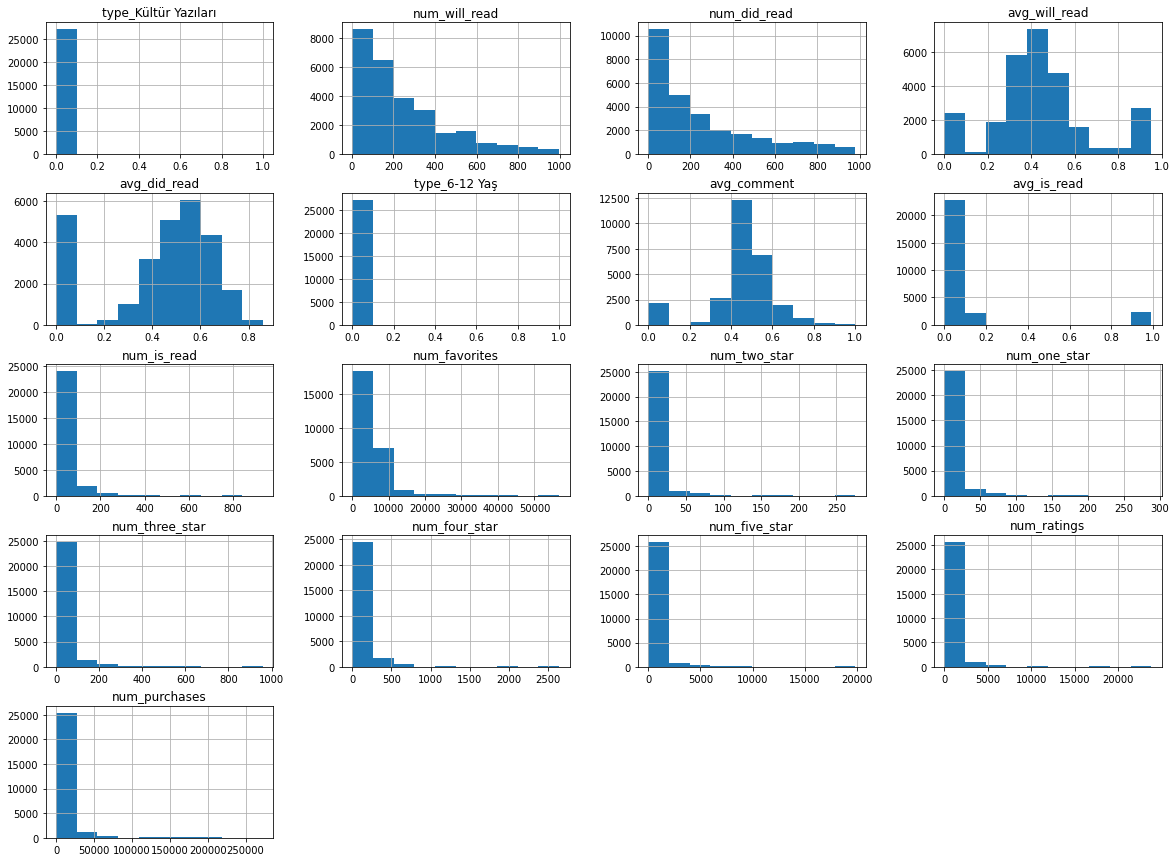

In [13]:
df.hist(figsize = (20,15))
plt.show()

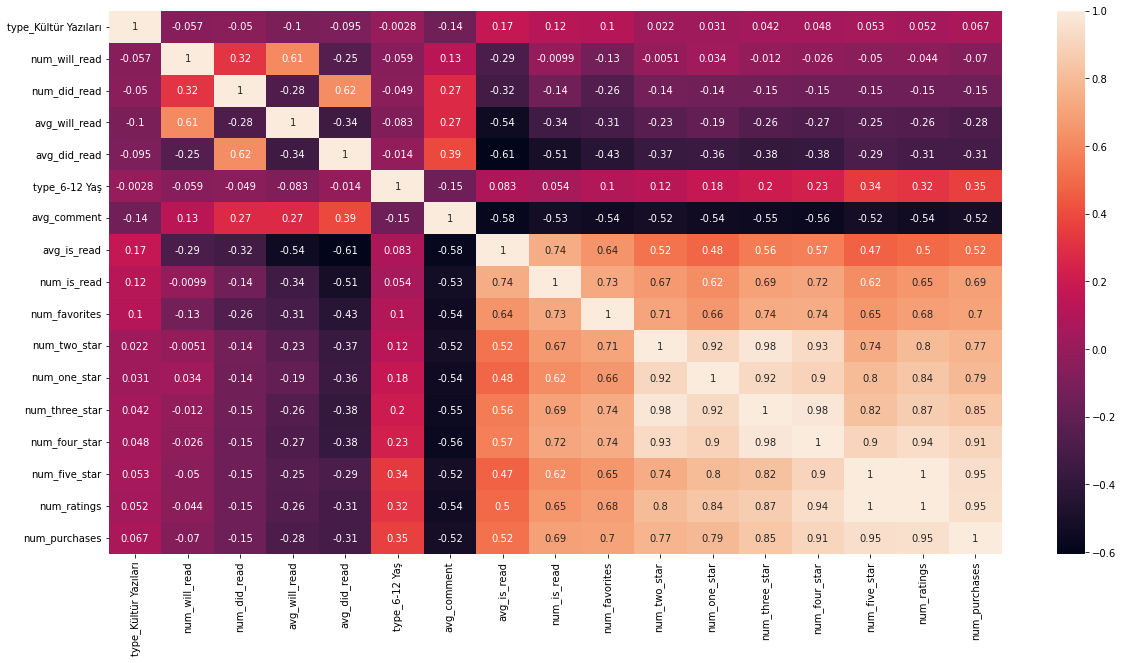

In [14]:
get_corr_matrix(df)

In [15]:
normalized_df=(df-df.mean())/df.std()

In [16]:
train, test = train_test_split(normalized_df, test_size=0.2, random_state=42)
train, validation = train_test_split(train, test_size=0.2, random_state=42)

y_train = train.num_purchases
X_train = train.drop(["num_purchases"], axis=1)
y_validation = validation.num_purchases
X_validation = validation.drop(["num_purchases"], axis=1)
y_test = test.num_purchases
X_test = test.drop(["num_purchases"], axis=1)

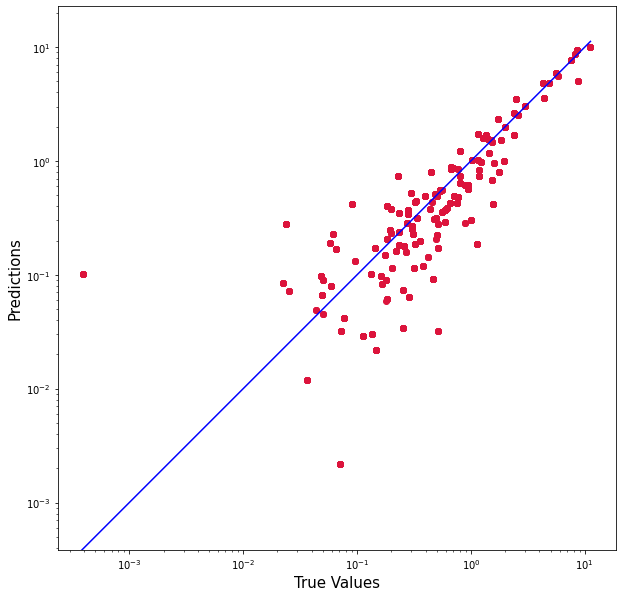

MSE is  0.07213869006687114


In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print_result(y_test, y_pred_lr)

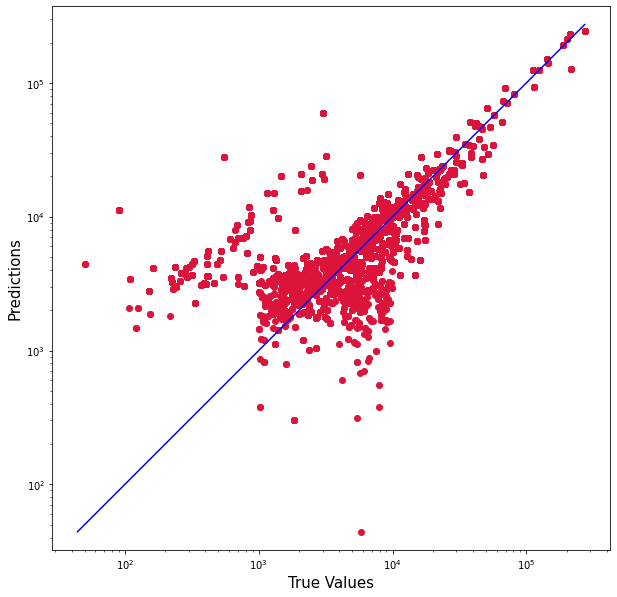

MSE is  39493241.10808249


In [19]:
print_result(y_test * df.num_purchases.std() + df.num_purchases.mean(), y_pred_lr * df.num_purchases.std() + df.num_purchases.mean())

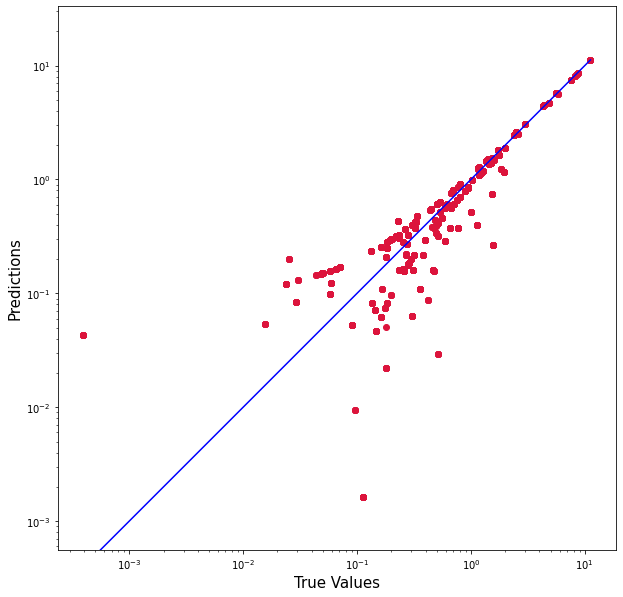

MSE is  0.02146223194074487


In [20]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
print_result(y_test, y_pred_svr)

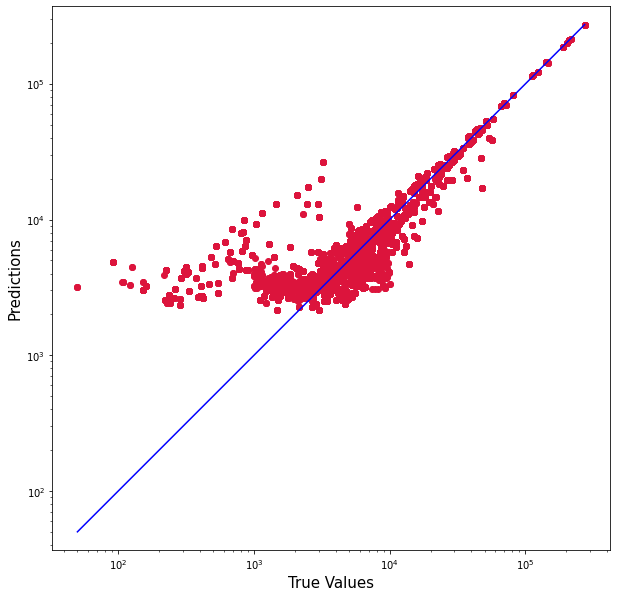

MSE is  11749771.169502877


In [21]:
print_result(y_test * df.num_purchases.std() + df.num_purchases.mean(), y_pred_svr * df.num_purchases.std() + df.num_purchases.mean())

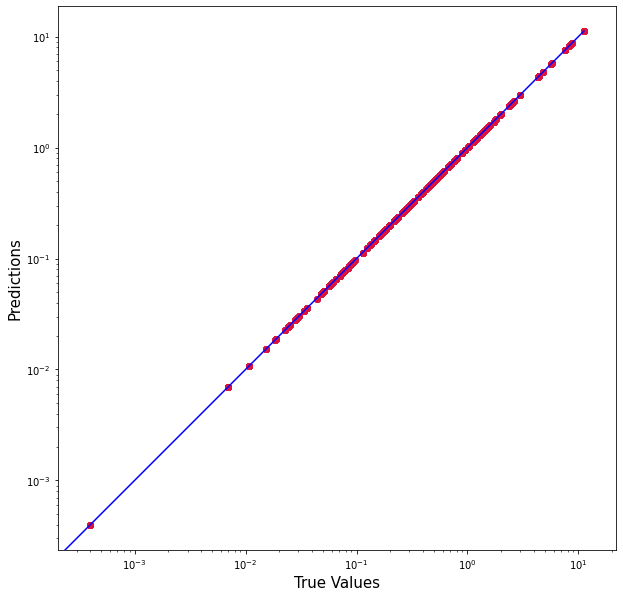

MSE is  1.01708047332506e-06


In [22]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)
print_result(y_test, y_pred_dtr)

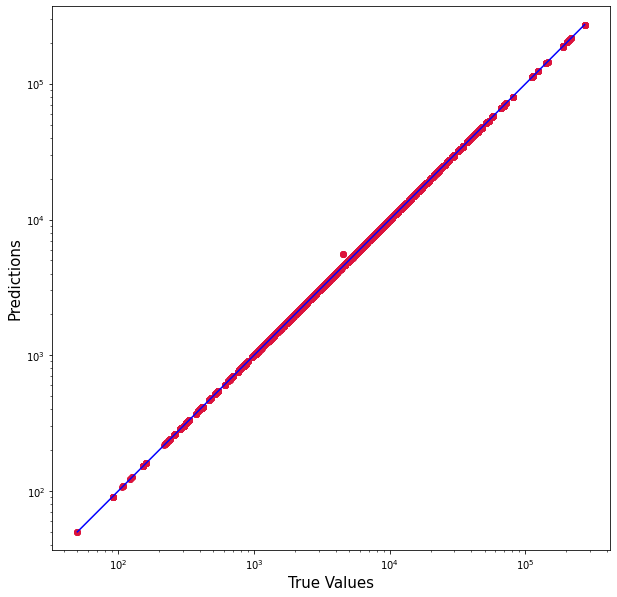

MSE is  556.8136089262849


In [24]:
print_result(y_test * df.num_purchases.std() + df.num_purchases.mean(), y_pred_dtr * df.num_purchases.std() + df.num_purchases.mean())

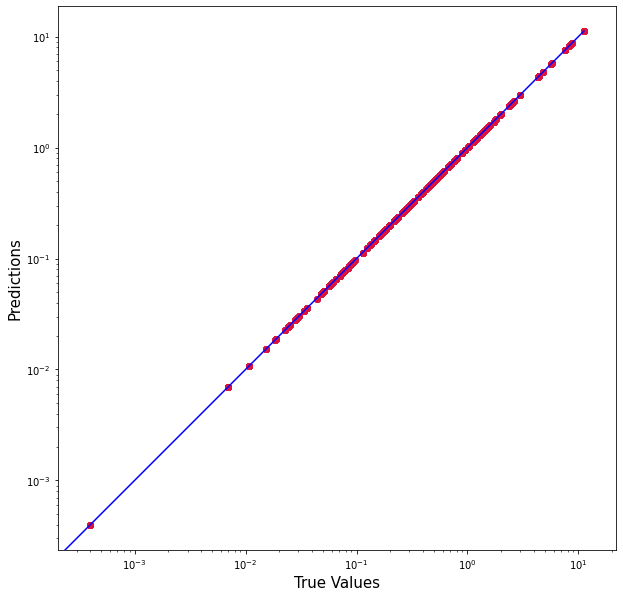

MSE is  2.8008413242517677e-06


In [25]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
print_result(y_test, y_pred_rfr)

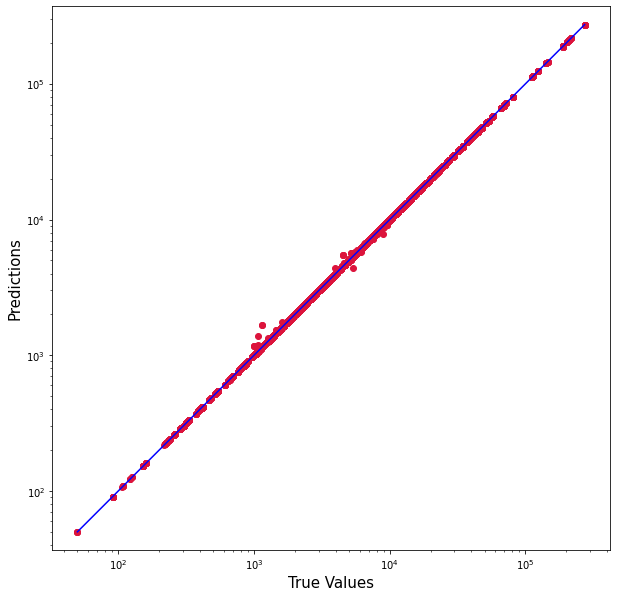

MSE is  1533.356117523326


In [26]:
print_result(y_test * df.num_purchases.std() + df.num_purchases.mean(), y_pred_rfr * df.num_purchases.std() + df.num_purchases.mean())

In [27]:
from keras.layers import Dense
from keras.models import Sequential

In [34]:
def build_model():
    model = Sequential()
    model.add(Dense(200, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
    model.add(Dense(100, kernel_initializer = 'uniform', activation='relu'))
    model.add(Dense(50, kernel_initializer = 'uniform', activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss="mse", optimizer="adam", metrics=["mse"])
    
    return model

In [35]:
model = build_model()
model.fit(X_train, y_train, epochs=100, batch_size=128)

Epoch 1/100
137/137 [==============================] - 1s 2ms/step - loss: 0.1617 - mse: 0.1617
Epoch 2/100
137/137 [==============================] - 0s 2ms/step - loss: 0.0618 - mse: 0.0618
Epoch 3/100
137/137 [==============================] - 0s 2ms/step - loss: 0.0543 - mse: 0.0543
Epoch 4/100
137/137 [==============================] - 0s 2ms/step - loss: 0.0506 - mse: 0.0506
Epoch 5/100
137/137 [==============================] - 0s 2ms/step - loss: 0.0449 - mse: 0.0449
Epoch 6/100
137/137 [==============================] - 0s 2ms/step - loss: 0.0446 - mse: 0.0446
Epoch 7/100
137/137 [==============================] - 0s 2ms/step - loss: 0.0324 - mse: 0.0324
Epoch 8/100
137/137 [==============================] - 0s 3ms/step - loss: 0.0281 - mse: 0.0281
Epoch 9/100
137/137 [==============================] - 0s 3ms/step - loss: 0.0217 - mse: 0.0217
Epoch 10/100
137/137 [==============================] - 0s 2ms/step - loss: 0.0159 - mse: 0.0159
Epoch 11/100
137/137 [=================

171/171 [==============================] - 0s 2ms/step


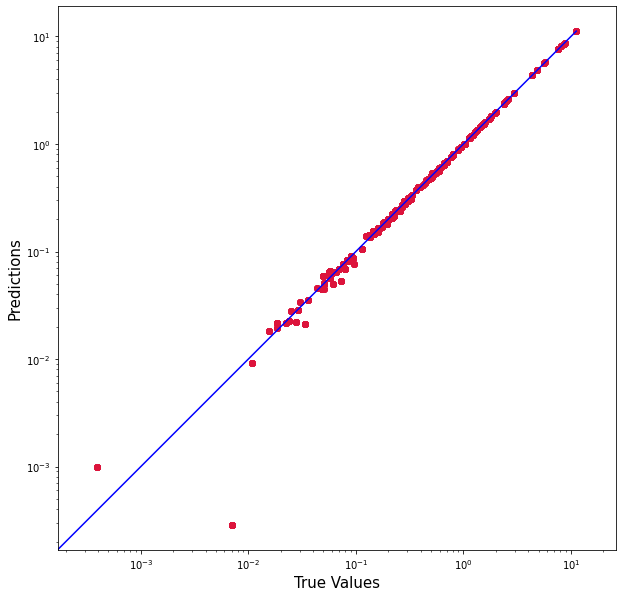

MSE is  0.0005046208717230766


In [36]:
y_pred_ann = model.predict(X_test)
print_result(y_test, y_pred_ann)

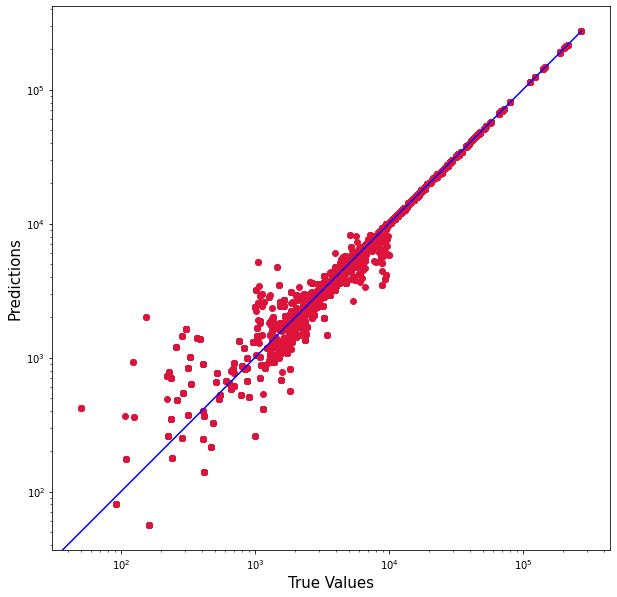

MSE is  276261.0877291643


In [37]:
print_result(y_test * df.num_purchases.std() + df.num_purchases.mean(), y_pred_ann * df.num_purchases.std() + df.num_purchases.mean())